In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Training and testing data from MNIST dataset for classification Neural network
training, testing = mnist.load_data()
# Training data
x_training = training[0]
y_training = training[1]
# Testing data
x_testing = testing[0]
y_testing = testing[1]

In [3]:
# 1) Identifying the proper-hyper-parameters of the network through train and validation and mentioned them in the text cell.
data = Sequential([Flatten(input_shape=(28,28)),Dense(64, activation='relu'),Dense(32, activation='relu'),Dense(10, activation='softmax'),])
data.compile(optimizer = 'adam',loss='SparseCategoricalCrossentropy', metrics=['accuracy'])
# validation split is 0.2 ==> 80, 20 % split
history = data.fit(x_training, y_training, validation_split=0.2, epochs=20, verbose=1)
data.evaluate(x_testing, y_testing)

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 1.6277 - accuracy: 0.7609 - val_loss: 0.4712 - val_accuracy: 0.8674
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4010 - accuracy: 0.8924 - val_loss: 0.3011 - val_accuracy: 0.9215
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2783 - accuracy: 0.9228 - val_loss: 0.2505 - val_accuracy: 0.9337
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2131 - accuracy: 0.9400 - val_loss: 0.2017 - val_accuracy: 0.9463
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1828 - accuracy: 0.9499 - val_loss: 0.1940 - val_accuracy: 0.9479
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1635 - accuracy: 0.9537 - val_loss: 0.1645 - val_accuracy: 0.9556
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1483 - accuracy: 0.9587 - val_loss: 0.1617 - val_accuracy:

[0.20841220021247864, 0.9613000154495239]

In [8]:
# 2) Identify the proper learning rate for the model and show the example graph of LR vs epochs for 5 different learning rates (you can define the range) for 20 epochs. (You need to plot 5 different loss vs epoch (train and validation) curves)

iterations = [0.002,0.004,0.006,0.008,0.01]
def func(history):
    plt.figure(facecolor='yellow')
    plt1 = plt.plot(history.history['loss'])
    plt2 = plt.plot(history.history['val_loss'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Training Loss', 'Validation Loss'])
    plt.title('Loss vs Epochs')
    labels = ["Loss", "Validation Loss"]
    plt.legend([plt1, plt2], labels=labels,loc="upper right")

In [9]:
def sequential_func():
        data = Sequential([Flatten(input_shape=(28,28)),Dense(64, activation='relu'),Dense(32, activation='relu'),Dense(10, activation='softmax'),])
        return data

In [10]:
def lnrate_func(lrn_rate):
    data = sequential_func()
    data.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=lrn_rate),loss='SparseCategoricalCrossentropy', metrics=['accuracy'])
    history = data.fit(x_training, y_training, validation_split=0.2, epochs=20, verbose=1)
    data.evaluate(x_testing, y_testing)
    return history

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 1.8484 - accuracy: 0.6276 - val_loss: 0.5757 - val_accuracy: 0.8376
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4949 - accuracy: 0.8666 - val_loss: 0.3465 - val_accuracy: 0.9042
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3256 - accuracy: 0.9118 - val_loss: 0.2760 - val_accuracy: 0.9295
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2739 - accuracy: 0.9268 - val_loss: 0.2469 - val_accuracy: 0.9391
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2499 - accuracy: 0.9325 - val_loss: 0.2537 - val_accuracy: 0.9295
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2312 - accuracy: 0.9387 - val_loss: 0.2467 - val_accuracy: 0.9404
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2227 - accuracy: 0.9403 - val_loss: 0.2499 - val_accuracy:

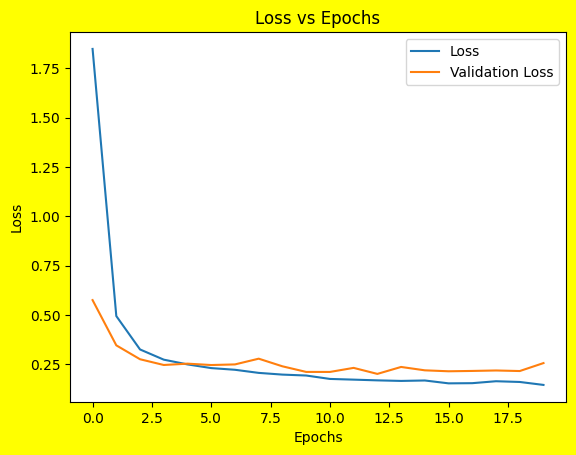

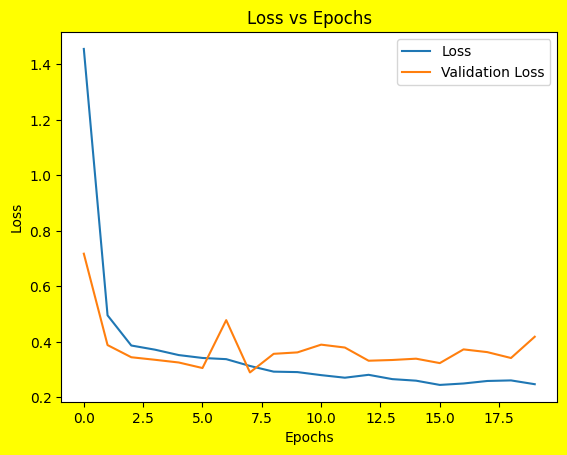

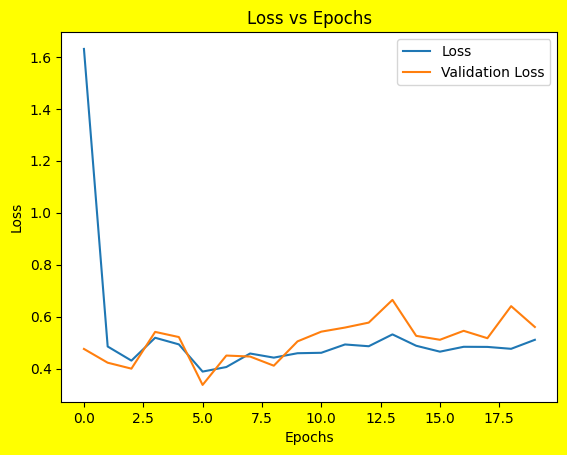

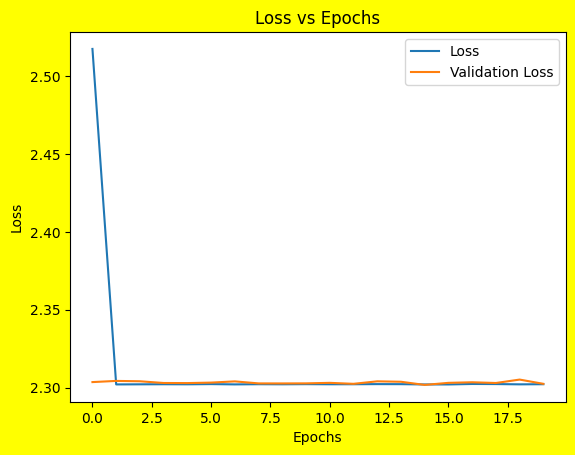

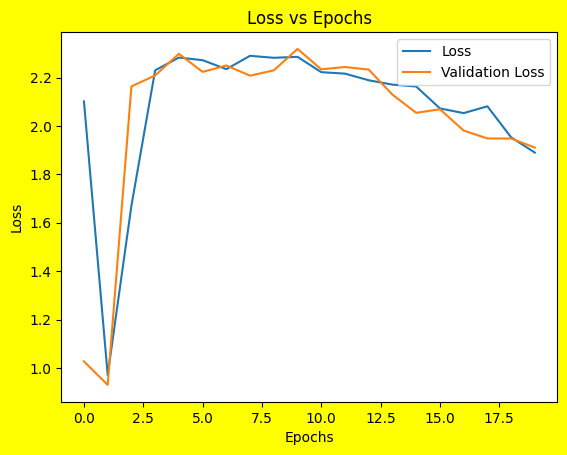

In [11]:

history = []
for i in range(len(iterations)):
    history.append(lnrate_func(iterations[i]))

for i in range(len(history)):
    func(history[i])